## US CONSUMER FINANCE COMPLAINTS DATA ANALYSIS
### by Kola Ademola

In [1]:
#import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load dataset

dates_col = ['date_received', 'date_sent_to_company']

df = pd.read_csv('consumer_complaints.csv', parse_dates = dates_col)

#view dataset
df.head()

C:\Users\Phantom\AppData\Local\Temp\ipykernel_18272\1173888593.py:5: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('consumer_complaints.csv', parse_dates = dates_col)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067


In [3]:
#check basic dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  object        
 2   sub_product                   397635 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     212622 non-null  object        
 5   consumer_complaint_narrative  66806 non-null   object        
 6   company_public_response       85124 non-null   object        
 7   company                       555957 non-null  object        
 8   state                         551070 non-null  object        
 9   zipcode                       551452 non-null  object        
 10  tags                          77959 non-null   object        
 11  consumer_cons

In [4]:
#make a copy of data before cleaning

df_clean = df.copy()

In [5]:
#select columns of interest

cols = ['complaint_id', 'date_received', 'company', 'product', 'issue','state',
        'zipcode','submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?']

df_clean = df_clean[cols]

#view new dataset
df_clean

,complaint_id,date_received,company,product,issue,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
0,511074,2013-08-30,U.S. Bancorp,Mortgage,"Loan modification,collection,foreclosure",CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes
1,511080,2013-08-30,Wells Fargo & Company,Mortgage,"Loan servicing, payments, escrow account",CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes
2,510473,2013-08-30,Wells Fargo & Company,Credit reporting,Incorrect information on credit report,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No
3,510326,2013-08-30,"Navient Solutions, Inc.",Student loan,Repaying your loan,MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes
4,511067,2013-08-30,Resurgent Capital Services L.P.,Debt collection,False statements or representation,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
555952,919529,2014-07-01,Bank of America,Mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No
555953,918447,2014-07-01,Residential Credit Solutions,Mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Referral,2014-07-23,Closed with explanation,No,No
555954,114550,2012-07-10,BB&T Financial,Mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No
555955,1329963,2015-04-14,Global Recovery Group,Debt collection,Communication tactics,NaN,NaN,Phone,2015-04-14,Untimely response,No,No


In [6]:
#check for missing values

df_clean.isnull().sum()

complaint_id                       0
date_received                      0
company                            0
product                            0
issue                              0
state                           4887
zipcode                         4505
submitted_via                      0
date_sent_to_company               0
company_response_to_consumer       0
timely_response                    0
consumer_disputed?                 0
dtype: int64

In [7]:
#drop rows with missing values

df_clean = df_clean.dropna(axis = 0, how = 'any')

#confirm change
df_clean.isnull().sum()

complaint_id                    0
date_received                   0
company                         0
product                         0
issue                           0
state                           0
zipcode                         0
submitted_via                   0
date_sent_to_company            0
company_response_to_consumer    0
timely_response                 0
consumer_disputed?              0
dtype: int64

In [8]:
#check data info again

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551060 entries, 0 to 553096
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   complaint_id                  551060 non-null  int64         
 1   date_received                 551060 non-null  datetime64[ns]
 2   company                       551060 non-null  object        
 3   product                       551060 non-null  object        
 4   issue                         551060 non-null  object        
 5   state                         551060 non-null  object        
 6   zipcode                       551060 non-null  object        
 7   submitted_via                 551060 non-null  object        
 8   date_sent_to_company          551060 non-null  datetime64[ns]
 9   company_response_to_consumer  551060 non-null  object        
 10  timely_response               551060 non-null  object        
 11  consumer_disp

In [9]:
#convert "zipcode" to int
#select all rows with digits first
df_clean = df_clean[df_clean['zipcode'].astype(str).str.isdigit()]
#convert to int
df_clean['zipcode'] = df_clean['zipcode'].astype(int)


#confirm change
df_clean['zipcode'].dtype

dtype('int32')

In [10]:
#check dataset dimension after cleaning

rows = df_clean.shape[0]
col = df_clean.shape[1]

print('After cleaning the dataset I am left with: {} rows & {} columns' .format(rows, col))

After cleaning the dataset I am left with: 473403 rows & 12 columns


In [11]:
#create a new feature to hold the year complaint wwas recieved
df_clean['complaint_year'] = df_clean['date_received'].dt.year

In [12]:
#view final cleaned data

df_clean.head()

,complaint_id,date_received,company,product,issue,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_year
0,511074,2013-08-30,U.S. Bancorp,Mortgage,"Loan modification,collection,foreclosure",CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,2013
1,511080,2013-08-30,Wells Fargo & Company,Mortgage,"Loan servicing, payments, escrow account",CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,2013
2,510473,2013-08-30,Wells Fargo & Company,Credit reporting,Incorrect information on credit report,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No,2013
3,510326,2013-08-30,"Navient Solutions, Inc.",Student loan,Repaying your loan,MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,2013
4,511067,2013-08-30,Resurgent Capital Services L.P.,Debt collection,False statements or representation,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,2013


### What is the trend of complaints over time?

In [13]:
#getting the total count of complaints receivedeach year

yearly_comp = df_clean.groupby('complaint_year')['complaint_id'].count().reset_index()
yearly_comp.sort_values(by = 'complaint_id', ascending = False)

,complaint_year,complaint_id
3,2014,151619
4,2015,110646
2,2013,107169
1,2012,71877
5,2016,29560
0,2011,2532


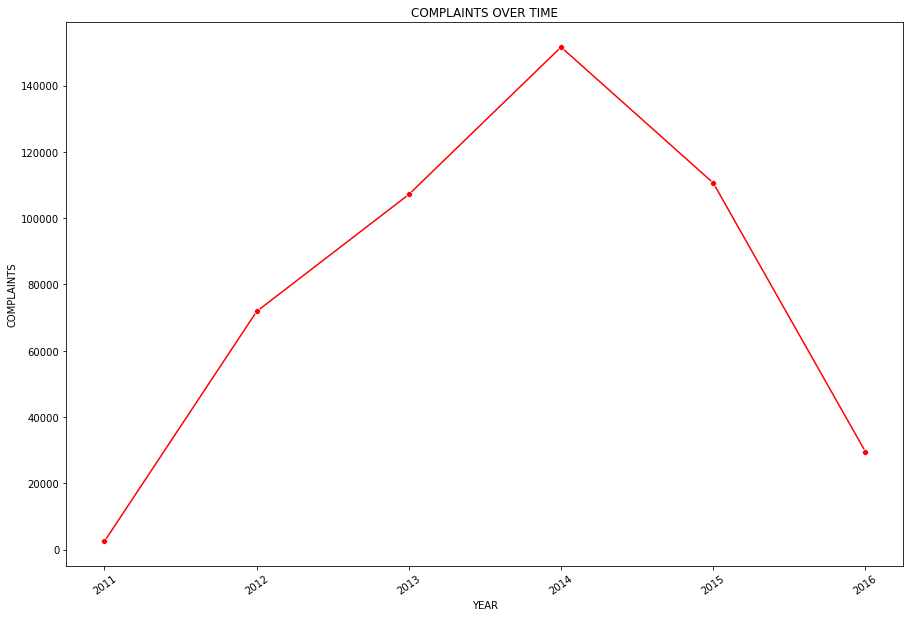

In [14]:
#line chart to show complaints trend

plt.figure(figsize = (15, 10))
sns.lineplot(data = yearly_comp, x = 'complaint_year', y = 'complaint_id', marker = 'o', color = 'red')
plt.title('COMPLAINTS OVER TIME')
plt.xlabel('YEAR')
plt.ylabel('COMPLAINTS')
plt.xticks(rotation = 35);

> There has been a steady increase in complaints over the years, but it was at its peak at over **150,000** complaints in just **2014** alone before taking a nose dive to below **30,000** in the following year.
What caused the increase in complaints over the years & why the decline as well from 2015;

### What is the cause of the increase in complaints?
> * Is there a particualar **Product** thats causing this surge in complaints?
> * Do this compaints come from a similar **Issue**?
> * Is there a particular **Dispute** related to this complaints?
> * Which **Company** are getting the most complaint?

#### Why the large amount of complaints in 2014?

In [15]:
#subset of dataset with complaints of each product yearly
prod_comp_yr = df_clean.groupby(['complaint_year', 'product']).size().reset_index(name = 'complaint_count').sort_values(
                by = ['complaint_year', 'complaint_count'], ascending=[True,False])
prod_comp_yr = prod_comp_yr[prod_comp_yr['complaint_year'] == 2014]

prod_comp_yr

,complaint_year,product,complaint_count
23,2014,Mortgage,42716
21,2014,Debt collection,38831
20,2014,Credit reporting,28912
17,2014,Bank account or service,14393
19,2014,Credit card,13867
18,2014,Consumer Loan,5412
27,2014,Student loan,4247
25,2014,Payday loan,1677
22,2014,Money transfers,1124
26,2014,Prepaid card,331


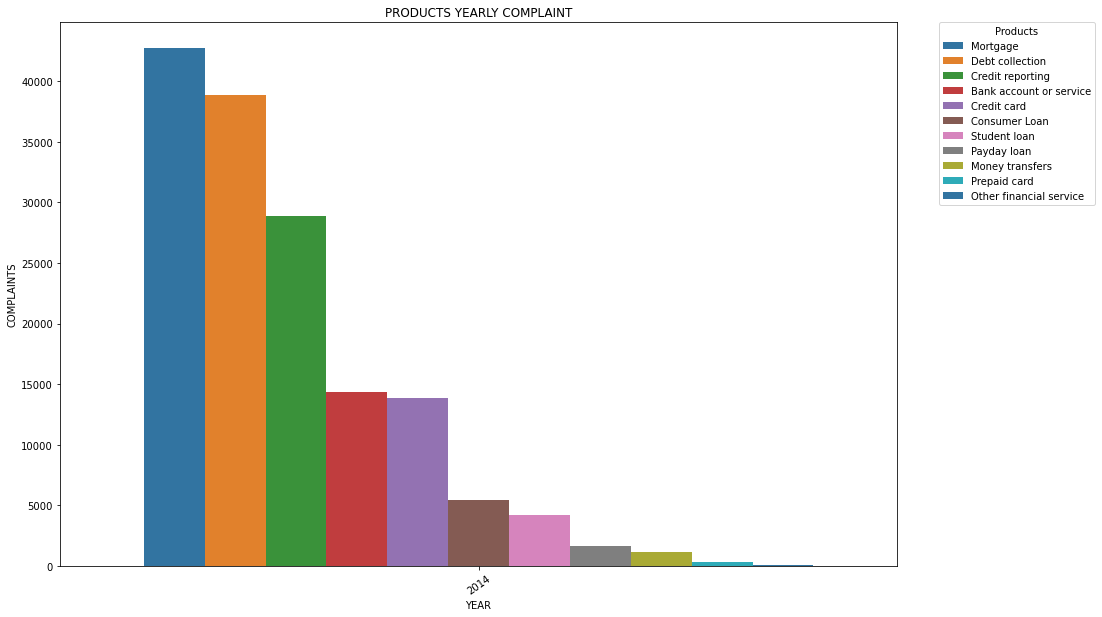

In [16]:
plt.figure(figsize = (15, 10))

sns.barplot(data = prod_comp_yr, x = 'complaint_year', y = 'complaint_count', hue = 'product', palette = 'tab10')
plt.legend(title = 'Products', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('PRODUCTS YEARLY COMPLAINT')
plt.xlabel('YEAR')
plt.ylabel('COMPLAINTS')
plt.xticks(rotation = 35);

> Complaints on the product **Mortgage** & **Debt collection** is the reason for the high number of complaints in **2014**

In [17]:
#creating a subset of the dataset with products and their total complaints

prod_comp = df_clean.groupby('product')['complaint_id'].count().reset_index().sort_values(by = 'complaint_id')

prod_comp

,product,complaint_id
7,Other financial service,403
9,Prepaid card,1490
5,Money transfers,2886
8,Payday loan,2971
10,Student loan,13261
1,Consumer Loan,16443
0,Bank account or service,55056
2,Credit card,56967
3,Credit reporting,76614
4,Debt collection,80321


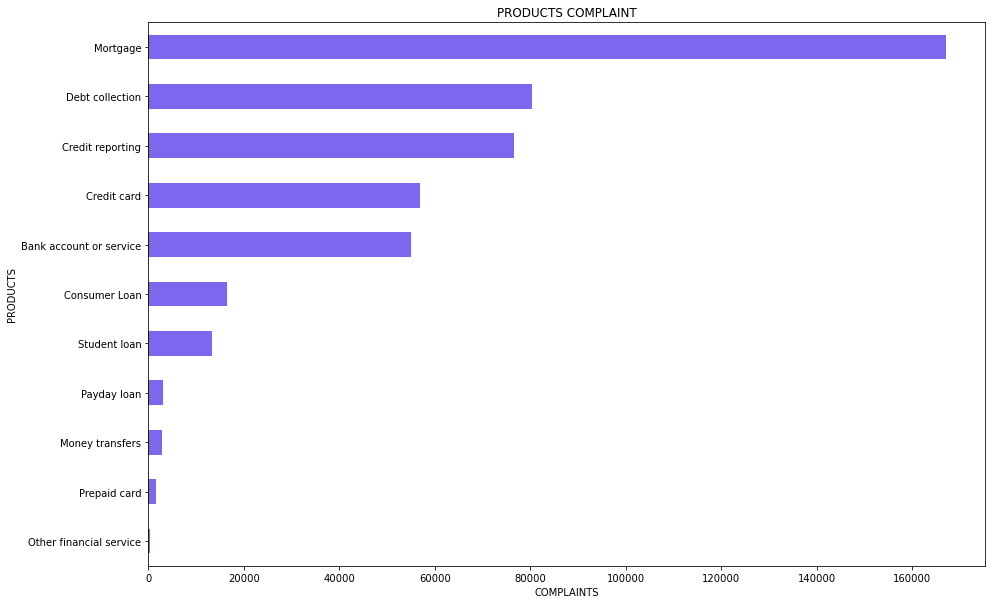

In [18]:
#visualization
color = 'mediumslateblue'
prod_comp.plot(kind = 'barh', x = 'product', y = 'complaint_id', color = color, figsize = (15, 10), legend = False)
plt.title('PRODUCTS COMPLAINT')
plt.ylabel('PRODUCTS')
plt.xlabel('COMPLAINTS');

> The bank product **Mortage** significantly has more complaints than other products, with over **166 Thousand** complaints. Is there a particular reason why **Mortage** received the most complaints, I have to find out.
### What is the **Issue** with the **Mortgage** product

In [19]:
#creating a subset of the data with only mortgage complaints

mortgage = df_clean[df_clean['product'] == 'Mortgage']

#filtering the data again for just product and issues columns
mortgage = mortgage[['complaint_id', 'product', 'issue', 'complaint_year']]
mortgage

,complaint_id,product,issue,complaint_year
0,511074,Mortgage,"Loan modification,collection,foreclosure",2013
1,511080,Mortgage,"Loan servicing, payments, escrow account",2013
9,530602,Mortgage,"Loan modification,collection,foreclosure",2013
11,511084,Mortgage,"Loan servicing, payments, escrow account",2013
12,511090,Mortgage,Credit decision / Underwriting,2013
...,...,...,...,...
553078,1769158,Mortgage,"Loan servicing, payments, escrow account",2016
553083,1776992,Mortgage,"Loan modification,collection,foreclosure",2016
553087,1866715,Mortgage,"Loan servicing, payments, escrow account",2016
553093,1859306,Mortgage,"Loan modification,collection,foreclosure",2016


> I would be checking if a particular **Issue** is common with the product.

In [20]:
#checking the types of issues
mortgage['issue'].value_counts()

Loan modification,collection,foreclosure    89656
Loan servicing, payments, escrow account    52347
Application, originator, mortgage broker    11325
Settlement process and costs                 5686
Other                                        4235
Credit decision / Underwriting               3742
Name: issue, dtype: int64

> from the result it's obvious the most issues has a common keyword **"Loan"** so I will be checking the total of all issues relating to "Loans" as compared to the other issues.

In [21]:
#getting all related "Loan" issues and putting them in another column for clarity

mortgage['loan/not_loan'] = mortgage['issue'].apply(lambda x: 'Loan related' if 'Loan' in x else 'Not Loan related')
mortgage

,complaint_id,product,issue,complaint_year,loan/not_loan
0,511074,Mortgage,"Loan modification,collection,foreclosure",2013,Loan related
1,511080,Mortgage,"Loan servicing, payments, escrow account",2013,Loan related
9,530602,Mortgage,"Loan modification,collection,foreclosure",2013,Loan related
11,511084,Mortgage,"Loan servicing, payments, escrow account",2013,Loan related
12,511090,Mortgage,Credit decision / Underwriting,2013,Not Loan related
...,...,...,...,...,...
553078,1769158,Mortgage,"Loan servicing, payments, escrow account",2016,Loan related
553083,1776992,Mortgage,"Loan modification,collection,foreclosure",2016,Loan related
553087,1866715,Mortgage,"Loan servicing, payments, escrow account",2016,Loan related
553093,1859306,Mortgage,"Loan modification,collection,foreclosure",2016,Loan related


In [22]:
#subset of the mortgage data to show the loan related issues
mortgage_loan = mortgage.groupby('loan/not_loan')['issue'].count().reset_index()
mortgage_loan

,loan/not_loan,issue
0,Loan related,142003
1,Not Loan related,24988


> There's a big margin between issues related to loan on the Mortgage product than there is for those not having anything to do with loans. But to show it better we will be visualising it.

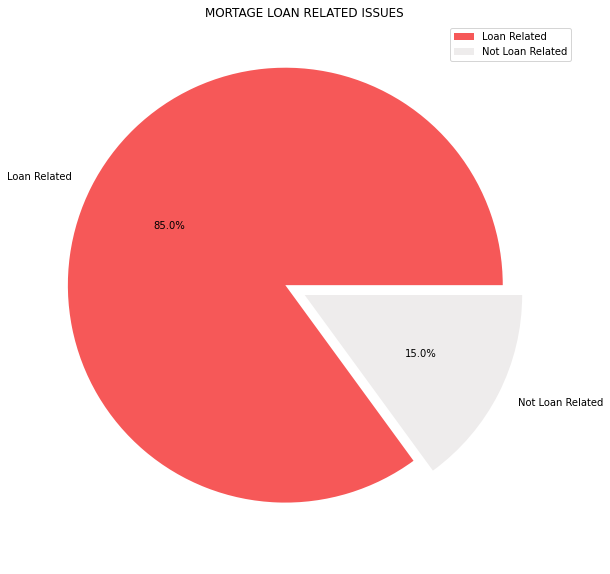

In [23]:
#visualisation

explode = (0.1, 0)
mortgage_loan.plot.pie(y = 'issue', explode = explode , autopct = '%1.1f%%', ylabel = '',
                       labels = ['Loan Related','Not Loan Related'], colors = ['#F65858', '#EEECEC'], figsize = (15, 10))
plt.title("MORTAGE LOAN RELATED ISSUES");

> It's very clear now that **"Loan Related Issues"** are the reason why the Product(**Mortgage**) has been getting too many complaints, with **85%** of the issues related to the product is about Loan in one way or the other. So now what is the problem with loans? Are they coming from a particular bank or a particular state? Let's find out.
### Which company has the most issues related to loans?

In [24]:
#creating a subset of the data and adding if they're loan related complaints/issues

df_clean['loan/not_loan'] = df_clean['issue'].apply(lambda x: 'Loan related' if 'Loan' in x else 'Not Loan related')

In [25]:
#subset with the number of loan related issues for companies

company = df_clean.groupby(['company', 'loan/not_loan'])['issue'].count().reset_index().sort_values(
                            by = ['loan/not_loan', 'issue'], ascending = [True, False]).head(5)
company

,company,loan/not_loan,issue
477,Bank of America,Loan related,29983
3721,Wells Fargo & Company,Loan related,19289
2541,Ocwen,Loan related,16411
1850,JPMorgan Chase & Co.,Loan related,12401
2423,Nationstar Mortgage,Loan related,9994


> **Bank of America** have a greater number of Loan Issues than other companies with over **29,000** issues.

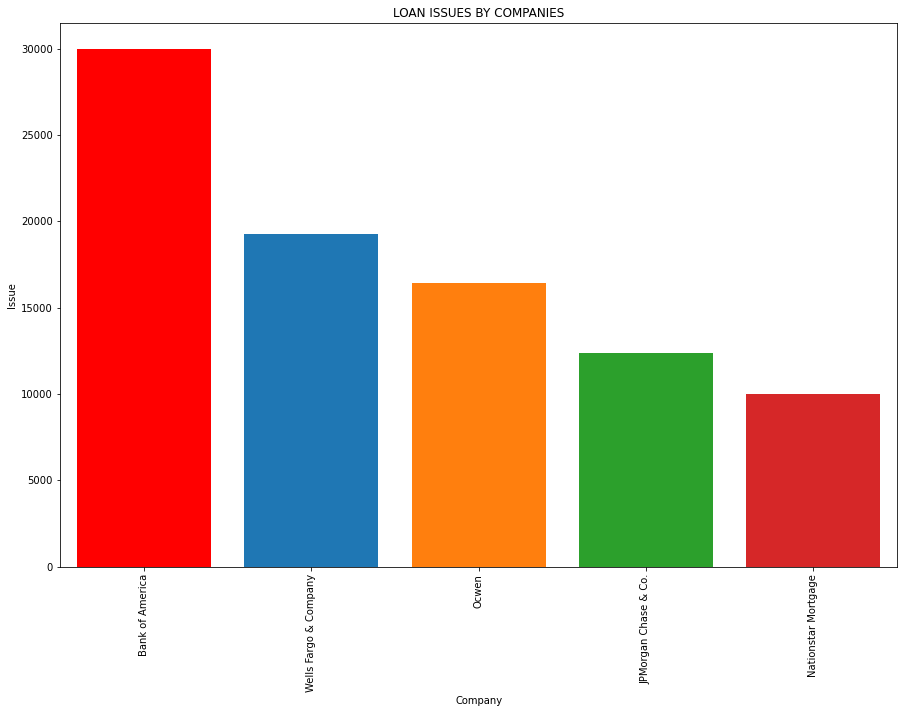

In [26]:
#visualization highlighting BOA
company.plot(kind = 'bar', x = 'company', y = 'issue', color = color, figsize = (15, 10), legend = False)


#df.plot.bar(x='column_name_x', y='column_name_y',legend=False)
for i in range(len(company)):
    if company.iloc[i]['issue'] == company['issue'].max():
        plt.bar(company.iloc[i]['company'], company.iloc[i]['issue'], color = 'red')
    else:
        plt.bar(company.iloc[i]['company'], company.iloc[i]['issue'])
plt.title('LOAN ISSUES BY COMPANIES')
plt.ylabel('Issue')
plt.xlabel('Company');

> **Bank of America** has the highest number of complaints on issues relating to **Loans(almost 30,000)**. Does it have anything to do with the location of the companies?

### What is the number of complaints by states?

In [27]:
state_comp = df_clean.groupby(['state', 'company', 'loan/not_loan'])['issue'].count().reset_index().sort_values(
                            by = ['state', 'loan/not_loan', 'issue'], ascending = [True, True, False])
state_comp

,state,company,loan/not_loan,issue
4,AA,Wells Fargo & Company,Loan related,2
2,AA,Citibank,Loan related,1
1,AA,Capital One,Not Loan related,2
0,AA,AES/PHEAA,Not Loan related,1
3,AA,KeyBank NA,Not Loan related,1
...,...,...,...,...
27795,WY,"WAKEFIELD & ASSOCIATES, INC.",Not Loan related,1
27799,WY,"Weltman, Weinberg & Reis",Not Loan related,1
27800,WY,"Western Control Services, Inc.",Not Loan related,1
27801,WY,"Williams & Fudge, Inc",Not Loan related,1


In [28]:
state_comp = state_comp[state_comp['loan/not_loan'] == 'Loan related'].sort_values(
                            by = ['loan/not_loan', 'issue'], ascending = [True, False])
state_comp.head(15)

,state,company,loan/not_loan,issue
2081,CA,Bank of America,Loan related,6154
3427,CA,Wells Fargo & Company,Loan related,4055
5387,FL,Bank of America,Loan related,3379
2922,CA,Ocwen,Loan related,3114
2659,CA,JPMorgan Chase & Co.,Loan related,2428
6502,FL,Wells Fargo & Company,Loan related,2217
2867,CA,Nationstar Mortgage,Loan related,2067
6681,GA,Bank of America,Loan related,1757
6060,FL,Ocwen,Loan related,1693
18235,NY,Bank of America,Loan related,1487


> **CA & FL** have the highest number of Loan issues

In [29]:
state_comp = state_comp.groupby('state').sum('issue').reset_index().sort_values(by = 'issue', ascending = False).head(10)
state_comp

,state,issue
8,CA,25775
13,FL,15750
42,NY,8664
15,GA,7191
39,NJ,6638
53,TX,6530
26,MD,5484
29,MI,4713
20,IL,4661
46,PA,4559


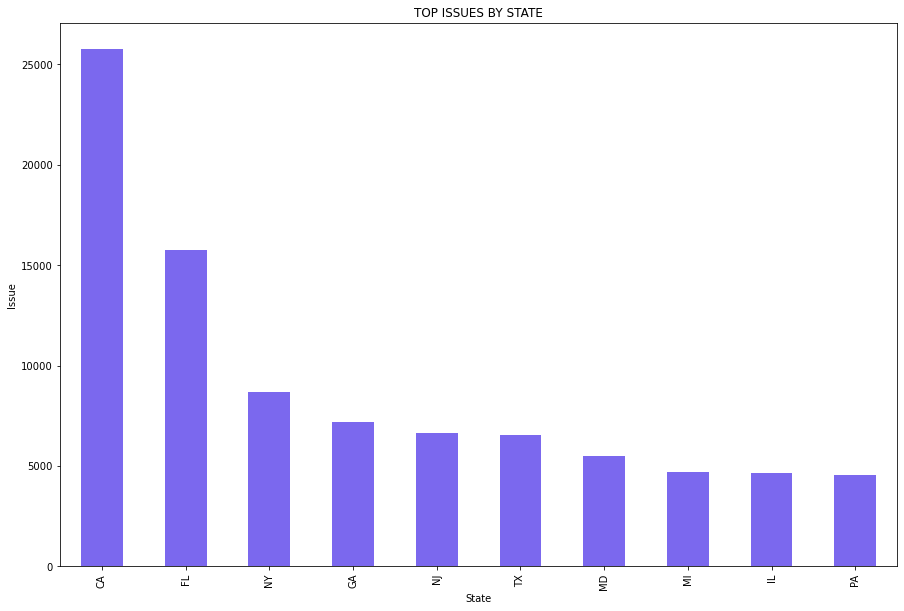

In [30]:
#visualization
color = 'mediumslateblue'
state_comp.plot(kind = 'bar', x = 'state', y = 'issue', color = color, figsize = (15, 10), legend = False)
plt.title('TOP ISSUES BY STATE')
plt.ylabel('Issue')
plt.xlabel('State');

> **CA & FL** have the most amount of issues at over **25,000 & 15,000** Issues recorded. Additional data will be needed for Further analysis will be needed to know why this states have such high number of issues.

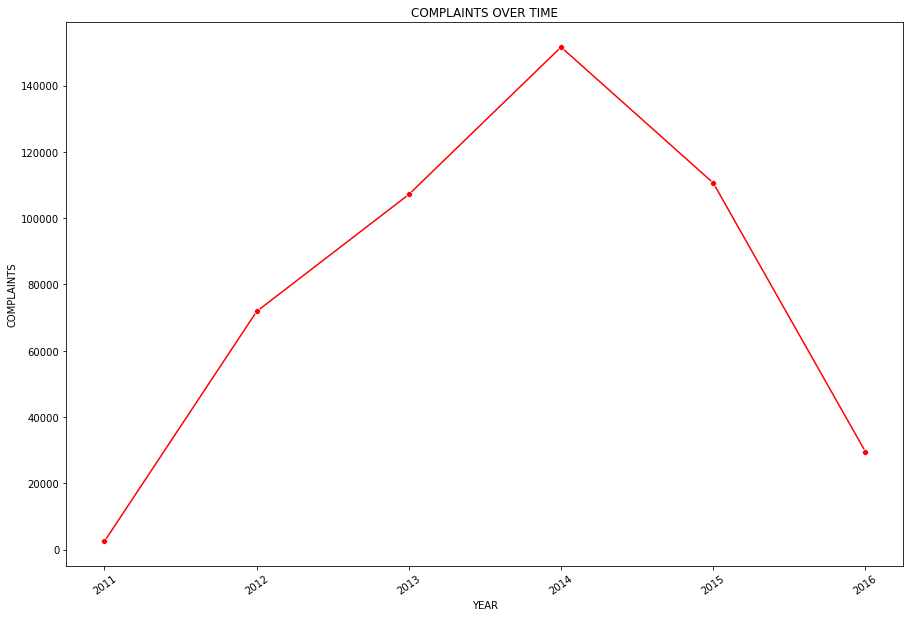

In [31]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = yearly_comp, x = 'complaint_year', y = 'complaint_id', marker = 'o', color = 'red')
plt.title('COMPLAINTS OVER TIME')
plt.xlabel('YEAR')
plt.ylabel('COMPLAINTS')
plt.xticks(rotation = 35);

> After digging into the data I found out;
* The product with the most complaints is **Mortgage**, but why;
* **Issues** with/related **Loan** are the cause for the high number of increasing complaints.
* Bank of America recorded the highest number of complaints & issues.
* **CA & FL** are the leading states with the most issues & complaints, further analysis should be carried out to know why.
> **Limitations::** There is not enough demographic data on the states to determine why most of the loan issues came from **CA & FL**

> AFter Investigating the reason for increase in complaints, I want to know why the suddent decline from 2015.
### What is the cause of decline in complaints from 2015?
* Did the companies drop the product causing alot of complaints(**Mortage**)?
* If NO, was it improved, did the complaints reduce significantly?
* Did the companies improve their products(**Mortgage** especially)?Did they


#### Did the companies drop the product causing alot of complaints(Mortage)?

In [32]:
#checking the products for 2015


prod_comp_yr = df_clean.groupby(['complaint_year', 'product']).size().reset_index(name = 'complaint_count').sort_values(
                by = ['complaint_year', 'complaint_count'], ascending=[True,False])
prod_comp_yr = prod_comp_yr[prod_comp_yr['complaint_year'] >= 2014]

prod_comp_yr

,complaint_year,product,complaint_count
23,2014,Mortgage,42716
21,2014,Debt collection,38831
20,2014,Credit reporting,28912
17,2014,Bank account or service,14393
19,2014,Credit card,13867
18,2014,Consumer Loan,5412
27,2014,Student loan,4247
25,2014,Payday loan,1677
22,2014,Money transfers,1124
26,2014,Prepaid card,331


> The same products are still in service so why the decline in complaints, 
### Are the products improved, did the complaints reduce significantly?

In [33]:
#subset of dataset with complaints of each product yearly
#products
prod_comp_yr_2015 = prod_comp_yr[prod_comp_yr['complaint_year'] >= 2014]

prod_comp_yr_2015

,complaint_year,product,complaint_count
23,2014,Mortgage,42716
21,2014,Debt collection,38831
20,2014,Credit reporting,28912
17,2014,Bank account or service,14393
19,2014,Credit card,13867
18,2014,Consumer Loan,5412
27,2014,Student loan,4247
25,2014,Payday loan,1677
22,2014,Money transfers,1124
26,2014,Prepaid card,331


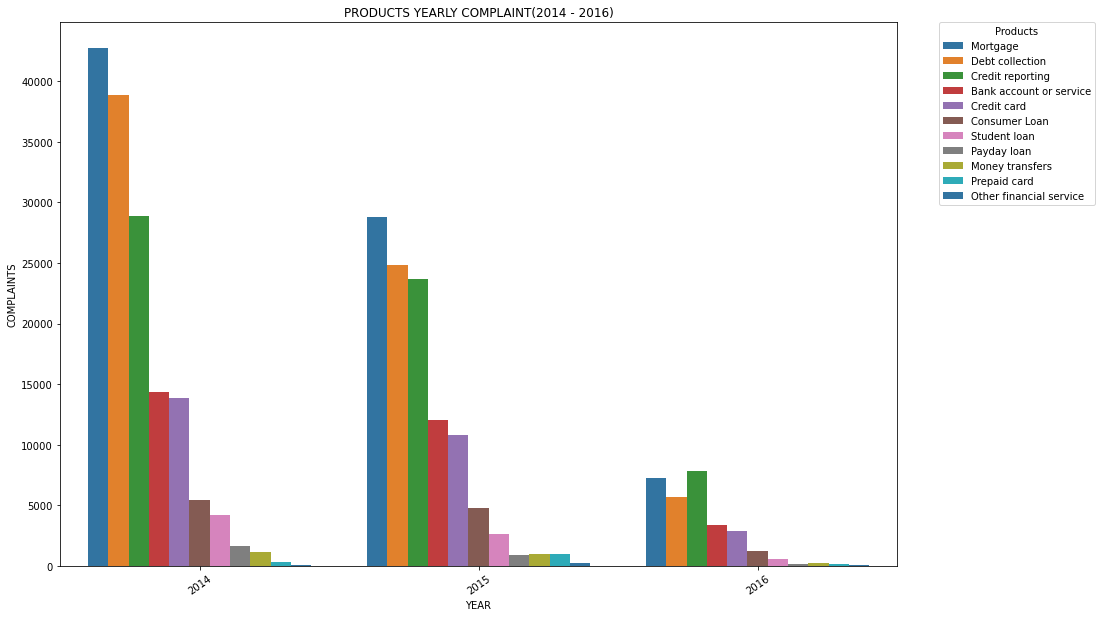

In [34]:
plt.figure(figsize = (15, 10))

sns.barplot(data = prod_comp_yr_2015, x = 'complaint_year', y = 'complaint_count', hue = 'product', palette = 'tab10')
plt.legend(title = 'Products', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('PRODUCTS YEARLY COMPLAINT(2014 - 2016)')
plt.xlabel('YEAR')
plt.ylabel('COMPLAINTS')
plt.xticks(rotation = 35);

> Thers's been a significant decrease in the number of complaints on the product **Mortgage**; It's safe to assume they're improving on it. But am intrested in knowing if the Loan related issues decreased as well.
#### Did Loan related issues decrease as well?

In [35]:
mortgage_2015 = mortgage.copy()
mortgage_2015 = mortgage_2015[mortgage_2015['complaint_year'] >= 2014]
mortgage_2015

,complaint_id,product,issue,complaint_year,loan/not_loan
4414,662650,Mortgage,Other,2014,Not Loan related
5812,744269,Mortgage,Settlement process and costs,2014,Not Loan related
11691,653461,Mortgage,Other,2014,Not Loan related
11720,654314,Mortgage,"Loan modification,collection,foreclosure",2014,Loan related
11751,654321,Mortgage,"Loan modification,collection,foreclosure",2014,Loan related
...,...,...,...,...,...
553078,1769158,Mortgage,"Loan servicing, payments, escrow account",2016,Loan related
553083,1776992,Mortgage,"Loan modification,collection,foreclosure",2016,Loan related
553087,1866715,Mortgage,"Loan servicing, payments, escrow account",2016,Loan related
553093,1859306,Mortgage,"Loan modification,collection,foreclosure",2016,Loan related


In [36]:
mortgage_2015 = mortgage_2015.groupby(['complaint_year', 'loan/not_loan'])['issue'].count().reset_index()
mortgage_2015

,complaint_year,loan/not_loan,issue
0,2014,Loan related,37030
1,2014,Not Loan related,5686
2,2015,Loan related,24122
3,2015,Not Loan related,4642
4,2016,Loan related,6106
5,2016,Not Loan related,1176


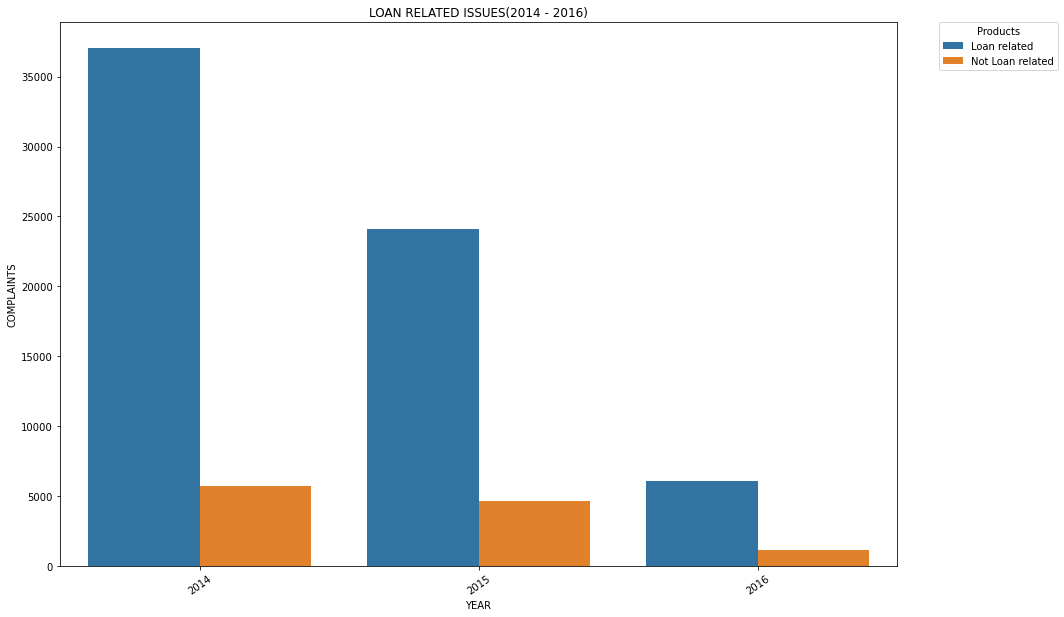

In [37]:
plt.figure(figsize = (15, 10))

sns.barplot(data = mortgage_2015, x = 'complaint_year', y = 'issue', hue = 'loan/not_loan', palette = 'tab10')
plt.legend(title = 'Products', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('LOAN RELATED ISSUES(2014 - 2016)')
plt.xlabel('YEAR')
plt.ylabel('COMPLAINTS')
plt.xticks(rotation = 35);

> I can see a steady amd significant decline in the Loan related issues as well so I can say there's been an improvement on their products.

## Conclusion & Reccomendation

After cleaning the data and doing a **Root Cause Analysis using the 5 why's**, I found out the Root cause of the high number of complaints in 2014 & the sudden decline from 2015;

> **Initial Problem: Why the high number of complaints in 2014?**
* The product with the most complaints is **Mortgage**,
>but why?;
* **Issues** with/related **Loan** are the cause for the high number of increasing complaints,
>why so much issues related to loans?.
* Bank of America recorded the highest number of complaints & issues,
>Why did Bank of America have such high nuber of complaints?.
* **CA & FL** are the leading states with the most issues & complaints, further analysis should be carried out to know why.
> **Limitations::** There is not enough demographic data on the states to determine why most of the loan issues came from **CA & FL**
> AFter Investigating the reason for increase in complaints, I wanted to know why the suddent decline from 2015.
### What is the cause of decline in complaints from 2015?
* Did the companies drop the product causing alot of complaints(**Mortage**)?
> The same products are still in service so why the decline in complaints so NO mortgage was not dropped from the products, 
* Since the same products are still available, were they improved, did the complaints reduce significantly?
> Thers's been a significant decrease in the number of complaints on the product **Mortgage**; It's safe to assume they're improving on it. But am intrested in knowing if the Loan related issues decreased as well.
#### Did Loan related issues decrease as well?
* Did the companies improve their products(**Mortgage** especially)?Did they
 > I can see a steady amd significant decline in the Loan related issues as well so I can say there's been an improvement on their products.

#### So the question of why was there so much complaints, was narrowed down to too many loan issues were raised is CA & FL for most Bank of America and Wells Fargo, so I will suggest the following;
* More data should be collected to understand the reason why so much loan related issues were coming from those states(**CA & FL**).
* Companies should improve on their products especially **Mortgage & Debts Collection**
* Companies should re-evaluate the way they hand **Loan** related issues as well.